<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.1">Пропуски</a></span></li><li><span><a href="#Типы" data-toc-modified-id="Типы-2.2">Типы</a></span></li><li><span><a href="#Продажи" data-toc-modified-id="Продажи-2.3">Продажи</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4">Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общее-количество-релизов-в-год" data-toc-modified-id="Общее-количество-релизов-в-год-3.1">Общее количество релизов в год</a></span></li><li><span><a href="#Продажи-по-платформам" data-toc-modified-id="Продажи-по-платформам-3.2">Продажи по платформам</a></span></li><li><span><a href="#Влияние-отзывов-критиков-на-продажи" data-toc-modified-id="Влияние-отзывов-критиков-на-продажи-3.3">Влияние отзывов критиков на продажи</a></span></li><li><span><a href="#Исследование-жанров" data-toc-modified-id="Исследование-жанров-3.4">Исследование жанров</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-3.5">Итоги</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4">Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Северная-Америка" data-toc-modified-id="Северная-Америка-4.1">Северная Америка</a></span></li><li><span><a href="#Европа" data-toc-modified-id="Европа-4.2">Европа</a></span></li><li><span><a href="#Япония" data-toc-modified-id="Япония-4.3">Япония</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4.4">Итоги</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-5.1">Первая гипотеза</a></span></li><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-5.2">Вторая гипотеза</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6">Выводы</a></span></li></ul></div>

# Определение закономерностей, определяющих успешность игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
from matplotlib import cycler
colors = cycler('color',
                ['#EAC435', '#345995', '#8C2D7E',
                 '#E40066', '#03CEA4', '#FB4D3D',
                 '#806045', '#04724D', '#FFFFFF',
                 '#00A8E8', '#88BB44', '#FFBBBB','#00FF00','#000000'])
plt.rc('axes',facecolor='#E6E6E6',  edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.999)})

df = pd.read_csv('/datasets/games.csv')

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обнаружены пропуски в значениях:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

Неверный тип данных:

- Year_of_release
- Critic_score
- User_score

### Вывод

Предоставленные данные это таблица, где каждая строка содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

При первом взгляде на таблицу и изучении общей информации о ней были обнаружены проблемы, которые могут негативно повлиять на выводы иссследования:
 - Пропуски значений
 - Неверный тип данных
 - Разный регистр названий столбцов

## Предобработка данных

### Пропуски

Приведем названия столбцов к нижнему регистру и изучим пропуски.

In [4]:
df.columns = df.columns.str.lower()

In [5]:
print('Пропуски name:',df['name'].isnull().sum())

Пропуски name: 2


Пропусков значений столбца name обнаружено мало - можем удалить строки с пропущенными значениями.

In [6]:
df.dropna(subset=['name'], inplace = True)  

In [7]:
print('Пропуски year_of_release:',df['year_of_release'].isnull().sum())

Пропуски year_of_release: 269


Пропусков значений столбца year_of_release обнаружено мало - можем удалить строки с пропущенными значениями.

In [8]:
df.dropna(subset=['year_of_release'], inplace = True) 

Пропуски значений critic_score скорее всего обозначают отсутвие оценки критиков в источнике на момент сбора данных. Пропуски не случайны - можем заполним их отметкой.

In [9]:
df['critic_score'] = df['critic_score'].fillna(-999)

Изучим значения столбца user_score - тип столбца object может обозначать что в стоблце присутвуют не только численные данные.

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме числовых значений рейтинга были обнаружены значения 'tbd' - To Be Determined. Эти значения обозначают, что общее количесвто ревью меньше 4 и их недостаточно для публикации общей оценки.
Для данного исследования это то же самое что и отсутвие оценки - заменим эти значения, а так же все пропущенные отметкой.

In [11]:
df['user_score'] = df['user_score'].fillna(-999)

In [12]:
df.loc[df['user_score'] == 'tbd','user_score'] = -9999

Прпущенные значения ESRB рейтинга обозначают отсутвие оценки этой организации у данных игр - пропуски случайны и мы можем заполнить их отметкой "NONE"

In [13]:
df['rating'] = df['rating'].fillna('NONE')

In [14]:
print('Количество пропусков',df.isna().sum().sum())

Количество пропусков 0


### Типы

Приведем столбцы к логичным типам:
 - year_of_release - для представления года выпуска подойдет int.
 - critic_score - оценка критиков выставляется целыми значениями от 1 до 100 - в этом случае подойдет int.
 - user_score - оценка пользователей выствялется от 1 до 10 с шагом в 0.1 - в этом случае подойдет float.

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')

Выведем инфо и проверим типы.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Продажи

Добавим в исходную талицу столбец с общими продажами.

In [17]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

### Вывод

Итоги предобработки:

Пропуски:
- Пропусков значений стобцов name, genre, и year_of_release мало - они составляют примерно 1.5% от выборки и вызваны предположительно отсутвием этих значений в источнике. Строки с пропщенными значениями были удалены.
- Пропуски значений оценок критиков, пользователей и ESRB рейтинга предположительно вызваны отсутвием этих данных в источнике. Пропущенные значения были заполнены отметкой.

Значения стоблцов были приведены к логичным типам, а так же был добавлен столбец с общим количеством продаж.

## Исследовательский анализ данных

### Общее количество релизов в год

Изучим общее количество релизов по годам.

In [18]:
release_by_year = df.groupby('year_of_release')['name'].count()

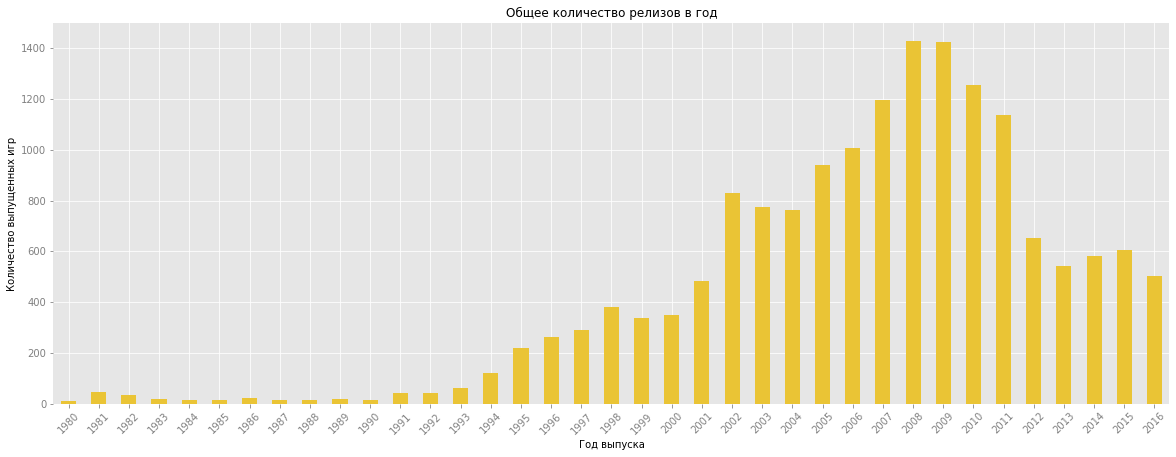

In [19]:
release_by_year.plot(kind='bar', rot=45, figsize = (20,7), grid = True)
ax = plt.axes()
plt.title('Общее количество релизов в год')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год выпуска')

plt.show()

Общее количество релизов для представленных платформ увеличивается на протяжении всего периода, вплоть до 2009 года. Падение после этого периода может быть обусловлено развитем смартфонов как игровых платформ. Предположительно, падение больше сказалось на спецализированных мобильных игровых платформах, таких как PlayStation Vita.

Для изучения продаж обзначим период с 2002 года по наше время - в этом периоде количество выпускаемых игр сильно увеличилось.

### Продажи по платформам

Изучим топ-14 платформ с наибольшими количеством проданных игр в периоде с 2002 года по наше время и оценим распределние продаж по годам.

In [20]:
sales_platform_chart = df.query('year_of_release > 2001').groupby('platform')['total_sales'].sum().sort_values(ascending = False).to_frame().reset_index()

In [21]:
top14_sales_platform = sales_platform_chart.head(14).set_index('platform')

In [22]:
top14_sales_platform

,total_sales
platform,
PS2,1027.96
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
PSP,289.53
3DS,257.81
GBA,251.28


In [23]:
platform_sales = df[(df.platform.isin(top14_sales_platform.index)) & (df['year_of_release'] > 2001)]\
.pivot_table(values = 'total_sales', index = 'year_of_release',columns = 'platform', aggfunc = ('sum'))

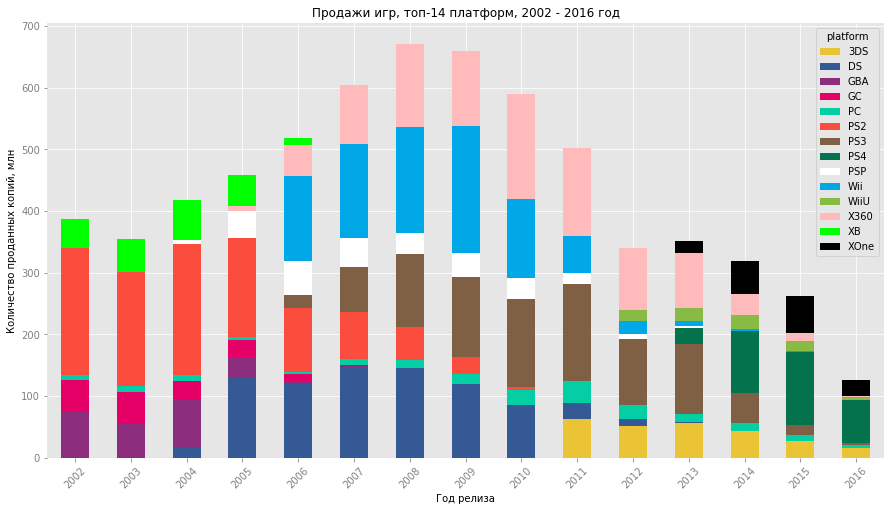

In [24]:
platform_sales.plot( kind='bar', rot=45, figsize = (15,8), stacked=True,grid = True)
ax = plt.axes()
plt.title('Продажи игр, топ-14 платформ, 2002 - 2016 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Год релиза')

plt.show()

Изучив предсвленный график прихоим к следующим выводам:

Сроки появления и полного исчезновения основных немобильных платформ предыдущего поколения:
 - PlayStation 3 - 10 лет.
 - Xbox 360 - 11 лет.
 - Nintendo Wii - 8 лет.
 
Актуальные платформы:
- Актуальными на данный момент добашними платформами являются PS4, XOne, WiiU
- Актуальными мобильными платформами на данный период являются 3DS и PlaysationVita, не попавшая в топ-14 и не представленная на графике по причине малых продаж.

Мобильные платформы постепенно вытесняются сматртфонами, по этой причине началом актуального периода будем считать 2012 - год начала выпуска актуальной домашней игровой консоли от Nintendo - WiiU. 

В итоге, ожидаемым актуальным перидом будем считать 2013 - 2023 год. Изучаемые платформы - XOne, PS4, WiiU, 3DS, PSV, а  так же персональные компьютеры.

Продажи для платформ предыдущего поколения, таких как PS3, анализировать не будем - игры для них постепенно перестают выпускаться.

Посмотрим на данные по продажам за текущий актуальный период, не включая 2016, так как данные за этот год могут быть неполными.

In [25]:
games = df.query('2011 < year_of_release < 2016')
filter_list=['XOne','PS4','WiiU','3DS','PSV','PC']
timely_sales = games.query('platform in @filter_list')\
.pivot_table(values = 'total_sales', index = 'year_of_release',columns = 'platform', aggfunc = ('sum'))


In [26]:
timely_sales

platform,3DS,PC,PS4,PSV,WiiU,XOne
year_of_release,,,,,,
2012,51.36,23.22,NaN,16.19,17.56,NaN
2013,56.57,12.38,25.99,10.59,21.65,18.96
2014,43.76,13.28,100.00,11.90,22.03,54.07
2015,27.78,8.52,118.90,6.25,16.35,60.14


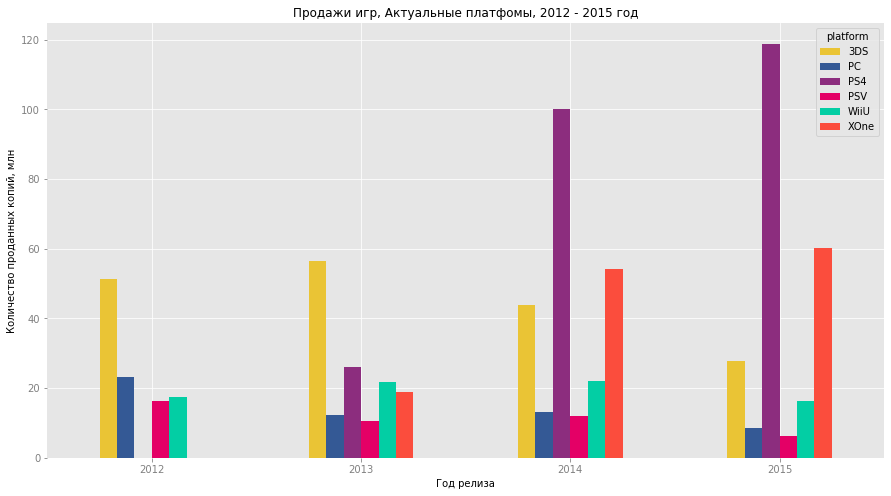

In [27]:
timely_sales.plot( kind='bar', rot=0, figsize = (15,8),grid = True)
ax = plt.axes()
plt.title('Продажи игр, Актуальные платфомы, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Год релиза')

plt.show()

Среди домашних консолей потенциально прибильные платформы - PS4 и XBoxOne, у которых наблюдается рост. Продажи игр для WiiU показывают отсутвие роста в течении рассматриваемого периода, с самыми малыми показателями в 2015 году.

Для портативных консолей 3DS и PSV ,как и и у персоналных компьютеров, наблюдается падение продаж.

По данным на на 2015 год, топ по общему количеству продаж для актуальных платформ выглядит так:
 1. PS4
 2. XOne
 3. 3DS
 4. WiiU
 5. PC
 6. PSV



Изучим график разброса среднего количества продаж каждой игры для актуальных консолей.
Выведем полный график, а так же ограниченный значениями в 4 миллиона продаж для более детального рассмотрения показателей.

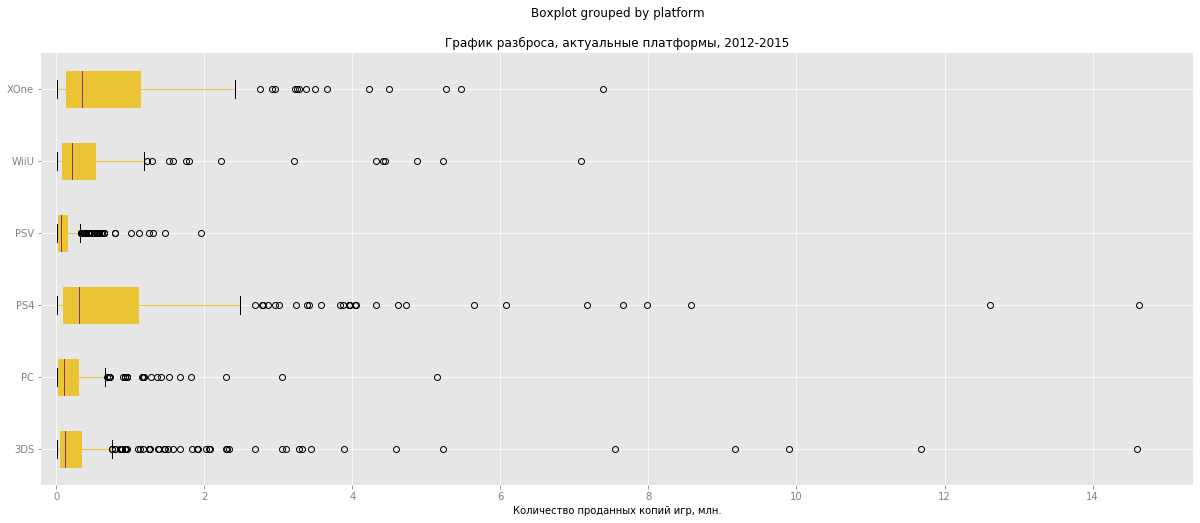

In [28]:

games.query('platform in @filter_list').boxplot('total_sales', figsize = (20,8),  by = 'platform', vert = False, patch_artist=True)
ax = plt.axes()
plt.xlim(-0.2,)
plt.xlabel('Количество проданных копий игр, млн.')
ax.set_title('График разброса, актуальные платформы, 2012-2015')
plt.show()

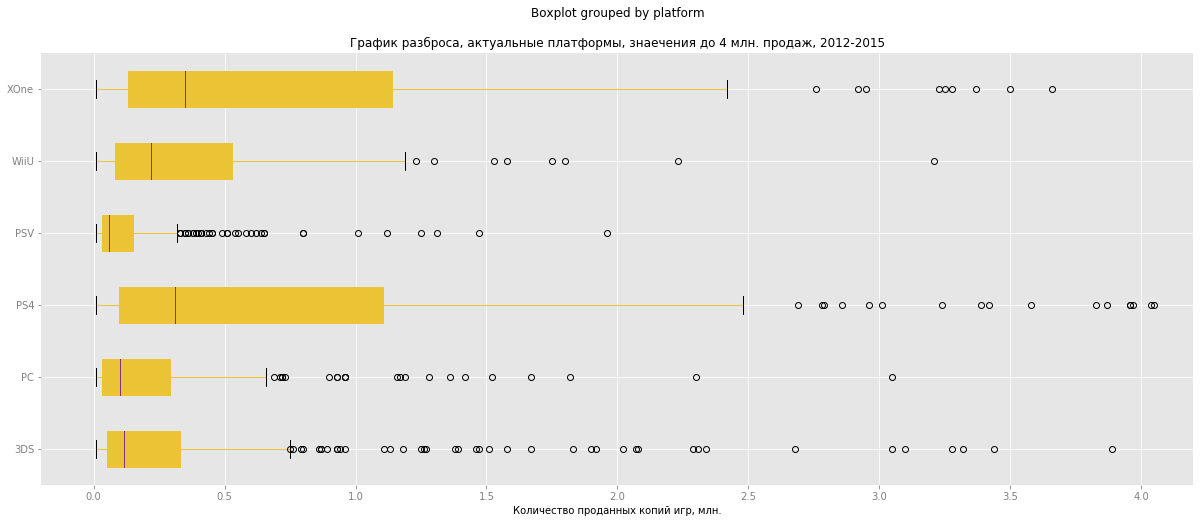

In [29]:

games.query('platform in @filter_list').boxplot('total_sales', figsize = (20,8),  by = 'platform', vert = False, patch_artist=True)
ax = plt.axes()
plt.xlim(-0.2,4.2)
plt.xlabel('Количество проданных копий игр, млн.')
ax.set_title('График разброса, актуальные платформы, знаечения до 4 млн. продаж, 2012-2015')
plt.show()

В процессе анализа графика разброса мы видим, что, неcмотря на меньшее количество общих продаж, средние показатели для каждой игры на Xbox больше, чем у PlayStation. WiiU замыкает тройку, среднее количество продаж на игру немногим меньше, чем у PS4. WiiU  так же имеет более чем в 2 раза меньший разброс основных значений, чем у Xbox и PlayStation.

Большее количество общих продаж для PS4 может объяснить довольно длинный хвост из тайтлов со значениями, превышающих отметку в 12 миллионов проданных копий. 

3DS, несмотря на на общее отставание показателей мобильных платформ от консолей, имеет длинный хвост из тайтлов с запредельно большим количеством продаж. Похожую форму разброса имеют и персональные компьютеры как платформа, за исключением отсутствия тайтлов с показателями продаж больше 3.5 миллионов проданных копий.

PSV имеет самые малые показатели среднего и ширины разброса среди всех платформ.




### Влияние отзывов критиков на продажи

Изучим зависимость между продажами и отзывами критиков на примере одной из самых популярных платформ - PS4

In [30]:
ps4_critic_score = games.query('platform == "PS4" and critic_score > -1')[['total_sales','critic_score']]
ps4_user_score = games.query('platform == "PS4" and user_score > -1')[['total_sales','user_score']]

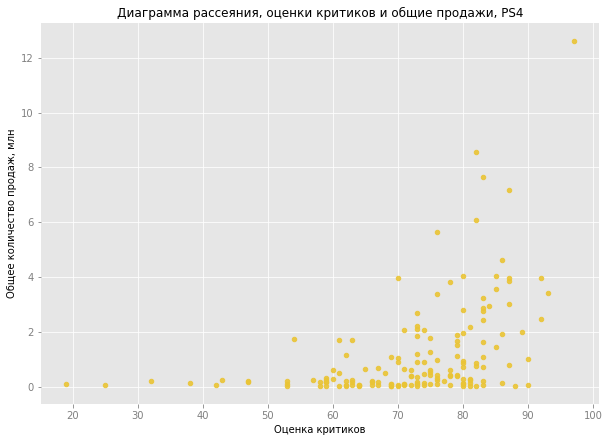

Коэффициент корреляции : 0.432


In [31]:
ps4_critic_score.plot(
    y = 'total_sales', x = 'critic_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния, оценки критиков и общие продажи, PS4')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(ps4_critic_score['total_sales'].corr(ps4_critic_score['critic_score'])))

На графике видна зависмость между оценкой критиков и общими продажами - игры с оценкой меньше 70 не превышают отметку в 2 миллиона продаж, а одна из игр с максимальной оценкой критиков имеет и максимальные продажи.

Тем не менее, многие игры с хорошими оценками имеют малые продажи - это отражает довольно небольшой коэффициент кореляции - 0.4

Изучим зависимость между продажами и оценками пользователей.

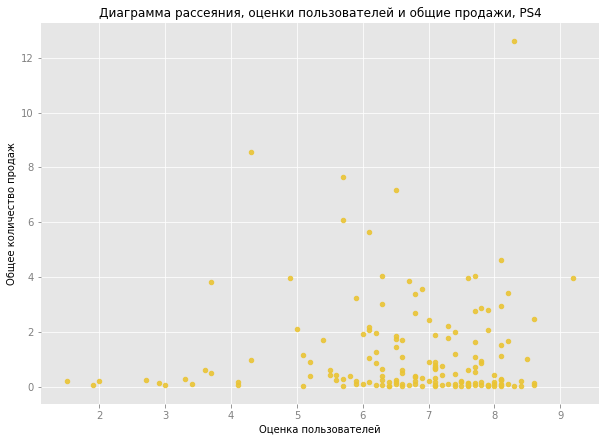

Коэффициент корреляции : 0.024


In [32]:
ps4_user_score.plot(
    y = 'total_sales', x = 'user_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния, оценки пользователей и общие продажи, PS4')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(ps4_user_score['total_sales'].corr(ps4_user_score['user_score'])))

Зависимости между оценками пользователей и продажами для PS4 обнаружено не было - коэффициент корреляции близок к 0

Изучим зависимость между оценками и продажами для Xbox One

In [33]:
xone_critic_score = games.query('platform == "XOne" and critic_score > -1')[['total_sales','critic_score']]
xone_user_score = games.query('platform == "XOne" and user_score > -1')[['total_sales','user_score']]

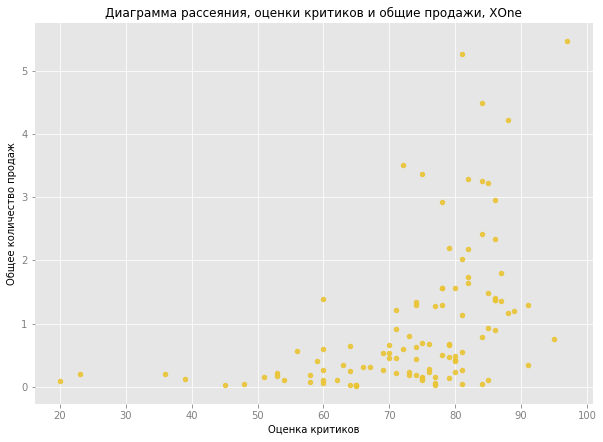

Коэффициент корреляции : 0.459


In [34]:
xone_critic_score.plot(
    y = 'total_sales', x = 'critic_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния, оценки критиков и общие продажи, XOne')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(xone_critic_score['total_sales'].corr(xone_critic_score['critic_score'])))

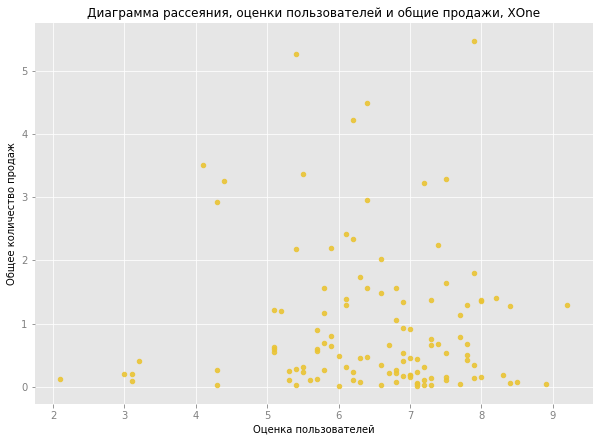

Коэффициент корреляции : -0.039


In [35]:
xone_user_score.plot(
    y = 'total_sales', x = 'user_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния, оценки пользователей и общие продажи, XOne')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(xone_user_score['total_sales'].corr(xone_user_score['user_score'])))

Для Xone зависимости между оценками и продажами практически такие же, как и у PS4.

Изучим зависимость между оценками и продажами для WiiU

In [36]:
wiiu_critic_score = games.query('platform == "WiiU" and critic_score > -1')[['total_sales','critic_score']]
wiiu_user_score = games.query('platform == "WiiU" and user_score > -1')[['total_sales','user_score']]

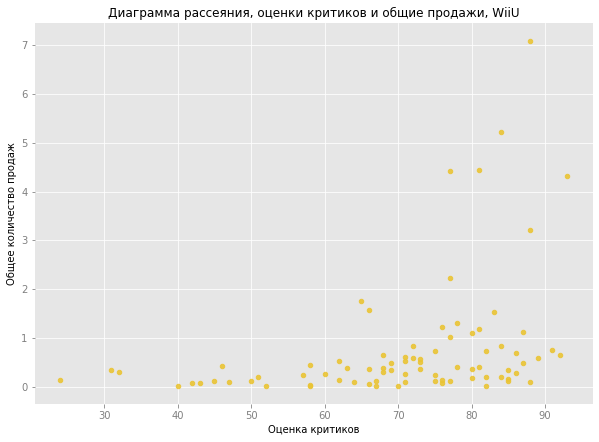

Коэффициент корреляции : 0.355


In [37]:
wiiu_critic_score.plot(
    y = 'total_sales', x = 'critic_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния, оценки критиков и общие продажи, WiiU')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(wiiu_critic_score['total_sales'].corr(wiiu_critic_score['critic_score'])))

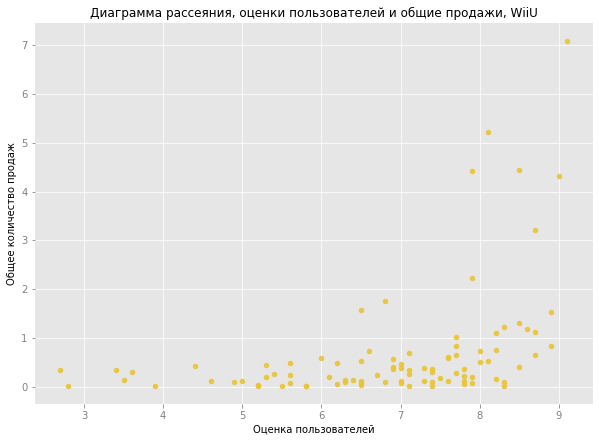

Коэффициент корреляции : 0.413


In [38]:
wiiu_user_score.plot(
    y = 'total_sales', x = 'user_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния, оценки пользователей и общие продажи, WiiU')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(wiiu_user_score['total_sales'].corr(wiiu_user_score['user_score'])))

Для WiiU наблюдаем зависимость продаж как от оценок критиков, так и пользователей. Тем не менее зависимость небольшая - коэффициент корреляции около 0.4 в обоих случаях.

Изучим зависимость между оценками и продажами для PC

In [39]:
pc_critic_score = games.query('platform == "PC" and critic_score > -1')[['total_sales','critic_score']]
pc_user_score = games.query('platform == "PC" and user_score > -1')[['total_sales','user_score']]

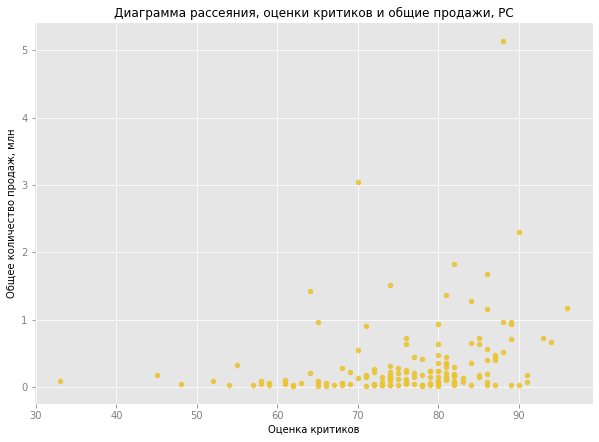

Коэффициент корреляции : 0.263


In [40]:
pc_critic_score.plot(
    y = 'total_sales', x = 'critic_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния, оценки критиков и общие продажи, PC')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(pc_critic_score['total_sales'].corr(pc_critic_score['critic_score'])))

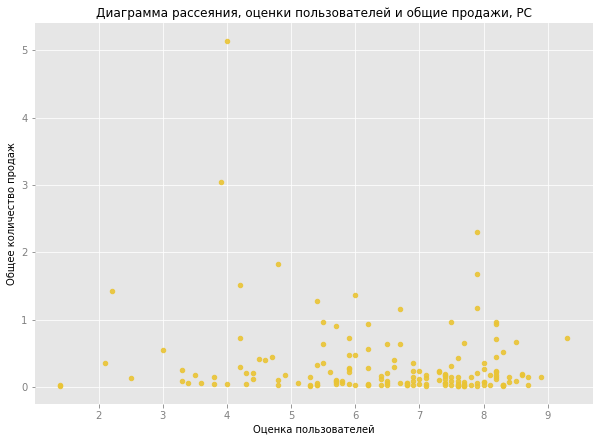

Коэффициент корреляции : -0.159


In [41]:
pc_user_score.plot(
    y = 'total_sales', x = 'user_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния, оценки пользователей и общие продажи, PC')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(pc_user_score['total_sales'].corr(pc_user_score['user_score'])))

Для персональных компьютеров зависмость между оценками критиков и продажами еще меньше чем у консолей - коэффициент корреляции 0.2.

Между оценками пользователей и продажами была обнаружена слабая обратная зависимость - тайтлам с большими продажами иногда ставят низкие оценки. Возможно это свзяано с низким качеством хорошо разрекламированных релизов. Коэффицициент корреляции в данном случае: -1.6.

Изучим зависимость между оценками и продажами для 3DS

In [42]:
ds_critic_score = games.query('platform == "3DS" and critic_score > -1')[['total_sales','critic_score']]
ds_user_score = games.query('platform == "3DS" and user_score > -1')[['total_sales','user_score']]

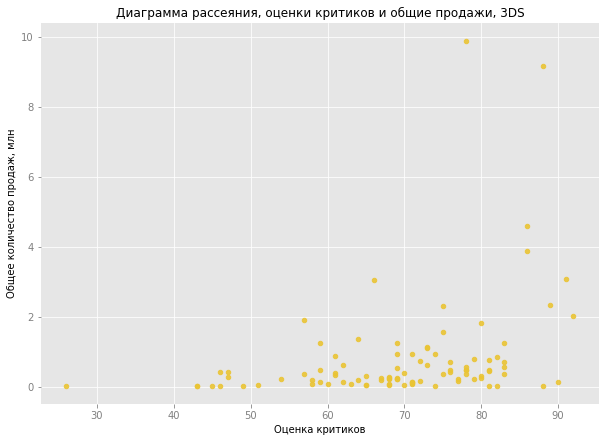

Коэффициент корреляции : 0.333


In [43]:
ds_critic_score.plot(
    y = 'total_sales', x = 'critic_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния, оценки критиков и общие продажи, 3DS')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(ds_critic_score['total_sales'].corr(ds_critic_score['critic_score'])))

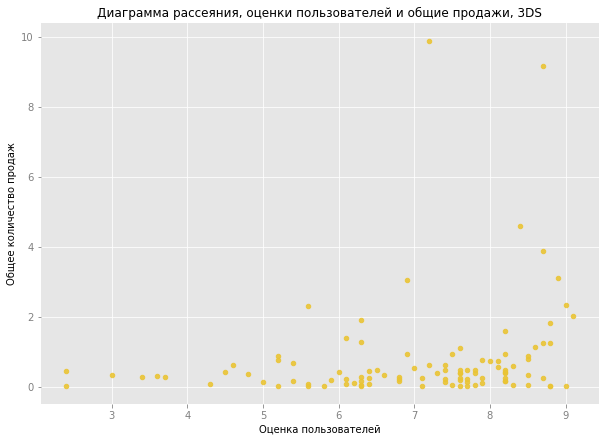

Коэффициент корреляции : 0.211


In [44]:
ds_user_score.plot(
    y = 'total_sales', x = 'user_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния, оценки пользователей и общие продажи, 3DS')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(ds_user_score['total_sales'].corr(ds_user_score['user_score'])))

Для 3DS зависимость между оценками критиков и продажами слабая - коэффициент корреляции: 0.3.
У оценки пользователей зависимость еще меньше - коэффициент корреляции: 0.2
Тем не менее, релизы с хорошими оценками критиков и пользователей часто имеют большие продажи.

Изучим зависимость между оценками и продажами для PSV

In [45]:
psv_critic_score = games.query('platform == "PSV" and critic_score > -1')[['total_sales','critic_score']]
psv_user_score = games.query('platform == "PSV" and user_score > -1')[['total_sales','user_score']]

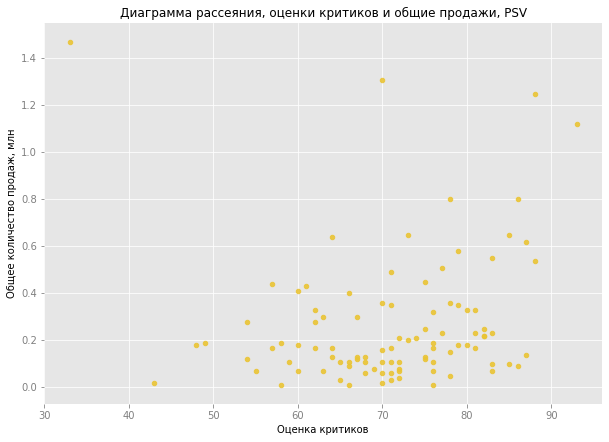

Коэффициент корреляции : 0.116


In [46]:
psv_critic_score.plot(
    y = 'total_sales', x = 'critic_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.title('Диаграмма рассеяния, оценки критиков и общие продажи, PSV')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(psv_critic_score['total_sales'].corr(psv_critic_score['critic_score'])))

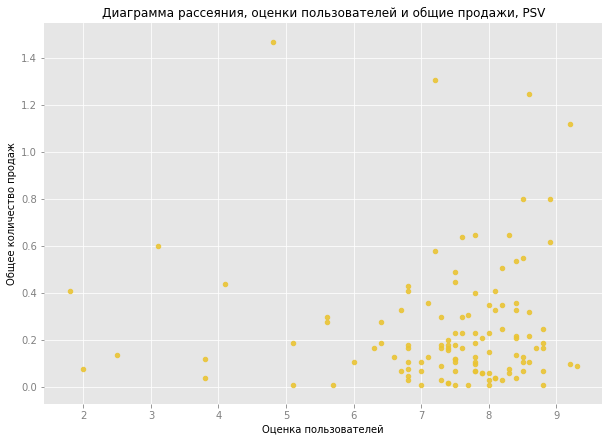

Коэффициент корреляции : 0.014


In [47]:
psv_user_score.plot(
    y = 'total_sales', x = 'user_score', kind = 'scatter',
    alpha = 0.9)
ax = plt.axes()
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.title('Диаграмма рассеяния, оценки пользователей и общие продажи, PSV')
plt.show()
print('Коэффициент корреляции : {:.3f}'.format(psv_user_score['total_sales'].corr(psv_user_score['user_score'])))

Для PSV зависимость практически отсутвует в обоих случаях. Возможная причины: минимальный оценка критиков у самой продаваемой игры и общие малые продажи для этой консоли.

### Исследование жанров

Изучим показатели успешности для каждого жанра. Показателем будем считать соотношение количества продаж к количеству релизов.

In [48]:
genre = games.query('platform in @filter_list').groupby('genre').agg({'name' : 'count', 'total_sales': 'sum'})
genre['ratio'] = genre['total_sales'] / genre['name']
genre.sort_values('ratio' , ascending = False, inplace = True)

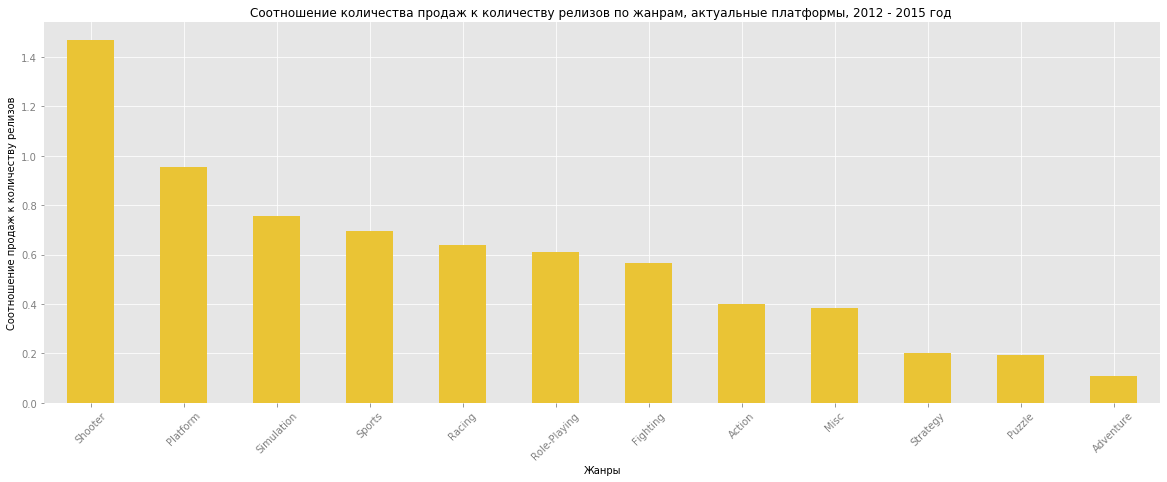

In [49]:
genre['ratio'].plot(kind='bar', rot=45, figsize = (20,7), grid = True)
ax = plt.axes()
plt.title('Соотношение количества продаж к количеству релизов по жанрам, актуальные платформы, 2012 - 2015 год ')
plt.ylabel('Соотношение продаж к количеству релизов')
plt.xlabel('Жанры')
plt.show()

Самыми прибыльными оказались игры жанров Shooter, Platform и Simulation, причем успешность "стрелялок" примерно в полтора раза больше, чем у остальных. 
В самом низу рейтинга оказлись игры жанров Strategy, Puzzle и Adventure

### Итоги

- В процессе исследования было изучены общие продажи игр для рассматриваемых платформ и обнаружено падение продаж начиная с периода 2009 года, вызванное развитием смартфонов как игровых платформ.
- Был опреден ожидаемый актуальный период и список актуальных платформ:
 - Актуальный период с 2013 по 2023 год.
 - Актуальные платформы - XOne, PS4, WiiU, 3DS, PSV и  PC
- Определены самые перспективные платформы -  PS4 и XOne
- Изучено влияние отзывов критиков и пользователей на продажи:
  - Практически для всех актуальных платформ обнаружена слабая прямая зависимость между оценками критиков и продажами - довольно часто игры с хорошими оценками критиков имеют и большие продажи.
  - Слабая прямая зависимость между оценками пользователей  и продажами была обнаружена только у консолей Nindendo. Для остальных консолей мнение пользователей с уровнем продаж практически не коррелирует. Исключение составили персональные компьютеры, для них эта зависимость небольшая, но отрицательная - играм с большими продажами для этой платформы пользователи иногда ставят плохие оценки.
- Изучены показатели успешности для всех жанров:
  - Самыми прибыльными оказались игры жанров Shooter, Platform и Simulation.
  - У игр жанров Strategy, Puzzle и Adventure отношение продаж к количеству релизов оказалось самым малым.

## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона (NA, EU, JP). Исследуем самые популярные платформы, жанры и влияние рейтинга на продажи.

### Северная Америка

In [50]:
top5platform_na = games.query('platform in @filter_list').groupby('platform')['na_sales'].sum().sort_values(ascending = False).to_frame().head()

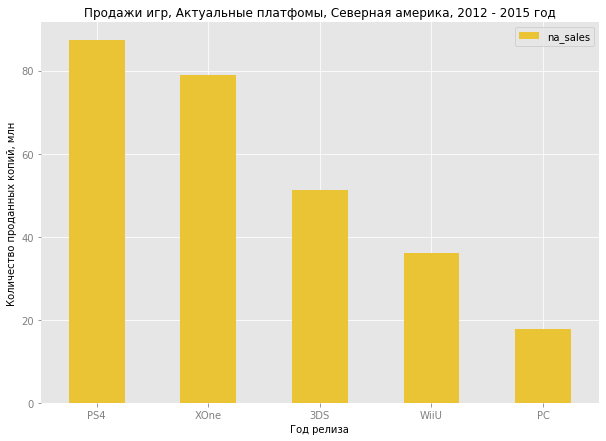

In [51]:
top5platform_na.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Продажи игр, Актуальные платфомы, Северная америка, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Год релиза')

plt.show()

Как и в общем по миру, PS4 занимает первое по продажам в Америке. Тем не менее Xbox на своей на родине совсем немного отстает по продажам от Sony.
3DS, несмотря на общее отставание мобильных платформ, занимает третье место, имея показатели продаж болшие, чем у WiiU и PC.

In [52]:
top5genre_na = games.query('platform in @filter_list').groupby('genre')['na_sales'].sum().sort_values(ascending = False).to_frame().head()

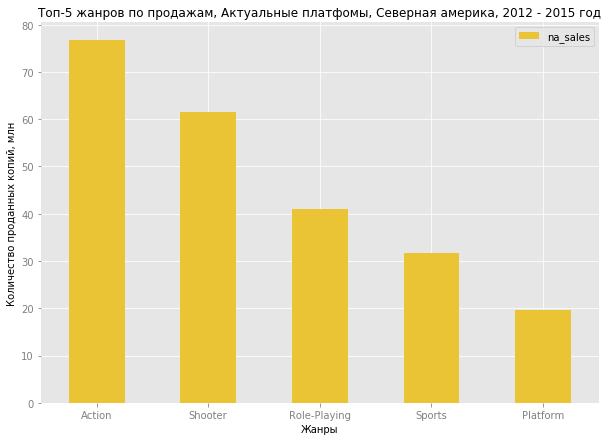

In [53]:
top5genre_na.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Топ-5 жанров по продажам, Актуальные платфомы, Северная америка, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Жанры')

plt.show()

Динамичные игры жанров Action и Shooter, часто представленные на PS и Xbox, являются самыми популярными в штатах.

In [54]:
rating_chart_na = games.query('platform in @filter_list').groupby('rating')['na_sales'].sum().sort_values(ascending = False).to_frame().head()

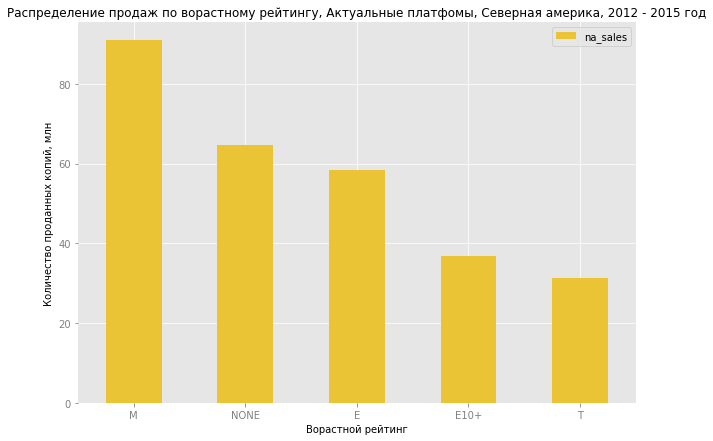

In [55]:
rating_chart_na.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Распределение продаж по ворастному рейтингу, Актуальные платфомы, Северная америка, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Ворастной рейтинг')

plt.show()

Игры для взрослых, которые часто представлены жанрами shooter и action, занимают первое место по продажам в американском регионе. У большого количества игр рейтинг не опредлелен - это может значить обозначать ошибку при выгрузке данных, либо играм еще не успели выставить возрастной рейтинг.

### Европа

In [56]:
top5platform_eu = games.query('platform in @filter_list').groupby('platform')['eu_sales'].sum().sort_values(ascending = False).to_frame().head()

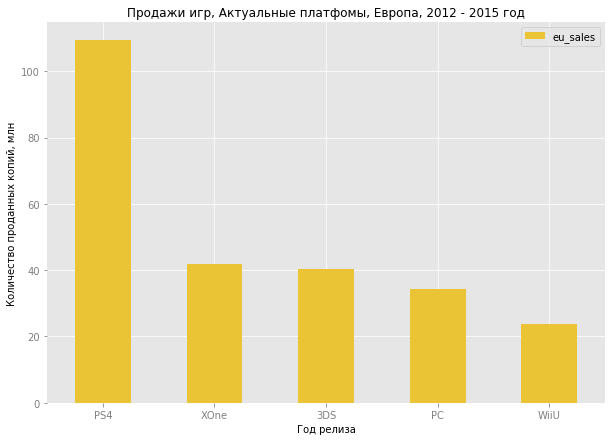

In [57]:
top5platform_eu.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Продажи игр, Актуальные платфомы, Европа, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Год релиза')

plt.show()

В европе продажи для xbox намного хуже, чем в штатах, и находятся на одном уровне 3DS и PC. WiiU так же не пользуется большой популярностью.

In [58]:
top5genre_eu = games.query('platform in @filter_list').groupby('genre')['eu_sales'].sum().sort_values(ascending = False).to_frame().head()

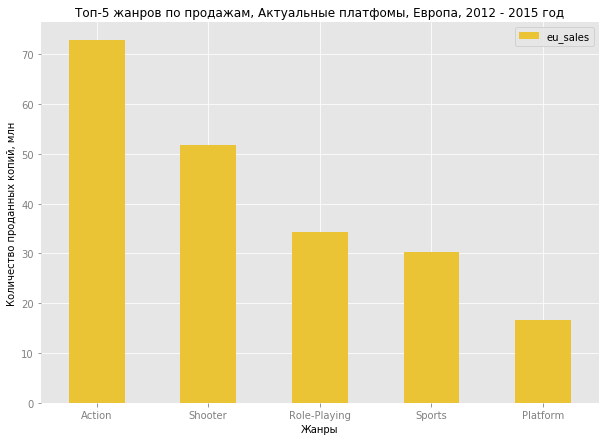

In [59]:
top5genre_eu.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Топ-5 жанров по продажам, Актуальные платфомы, Европа, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Жанры')

plt.show()

In [60]:
rating_chart_eu = games.query('platform in @filter_list').groupby('rating')['eu_sales'].sum().sort_values(ascending = False).to_frame().head()

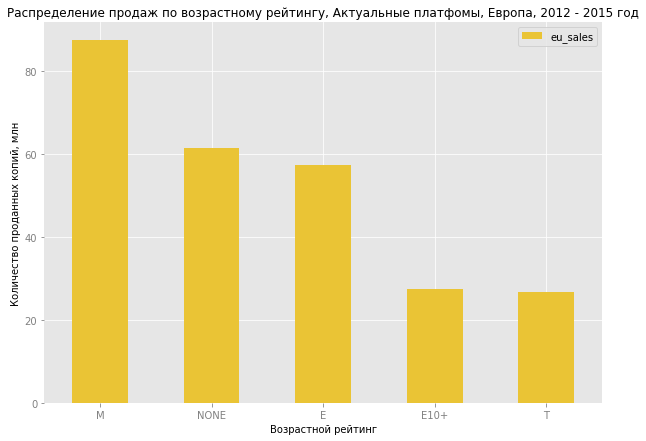

In [61]:
rating_chart_eu.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Распределение продаж по возрастному рейтингу, Актуальные платфомы, Европа, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Возрастной рейтинг')

plt.show()

Предпочтения по жанрам и возрастному рейтингу в европейском регионе абсолютно такие же, как и в штатах.

### Япония

In [62]:
top5platform_jp = games.query('platform in @filter_list').groupby('platform')['jp_sales'].sum().sort_values(ascending = False).to_frame().head()

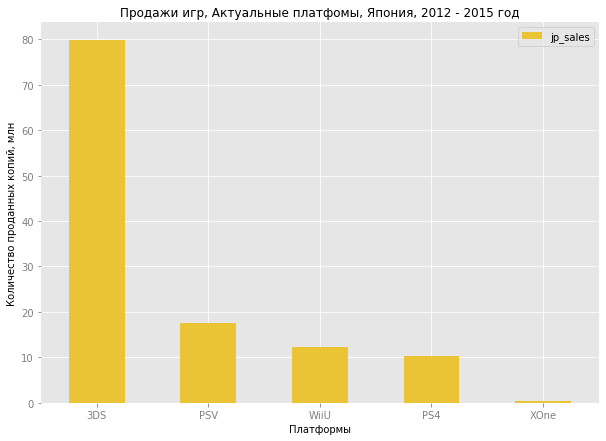

In [63]:
top5platform_jp.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Продажи игр, Актуальные платфомы, Япония, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Платформы')

plt.show()

На японском рынке ситуация с продажами сильно отличается от стального мира. Для мобильных консолей продажи здесь больше, чем для домашних. Самой популярной консолью, с большим отрывом от остальных, в японском регионе является 3DS. 

In [64]:
top5genre_jp = games.query('platform in @filter_list').groupby('genre')['jp_sales'].sum().sort_values(ascending = False).to_frame().head()

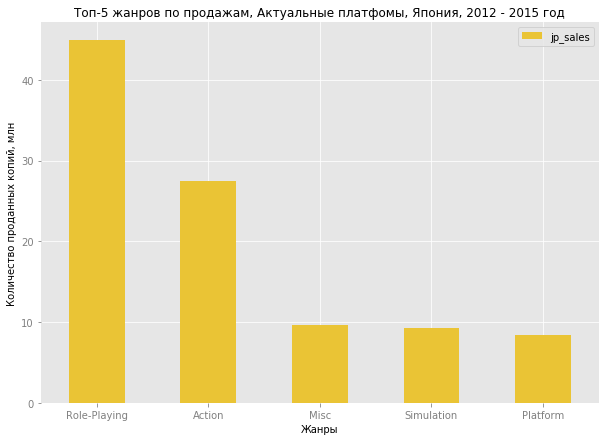

In [65]:
top5genre_jp.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Топ-5 жанров по продажам, Актуальные платфомы, Япония, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Жанры')

plt.show()

Игры жанра RPG и JRPG, широко представленные на консоли 3DS, занимают первое место по продажам в Японком регионе.

In [66]:
rating_chart_jp = games.query('platform in @filter_list').groupby('rating')['jp_sales'].sum().sort_values(ascending = False).to_frame().head()

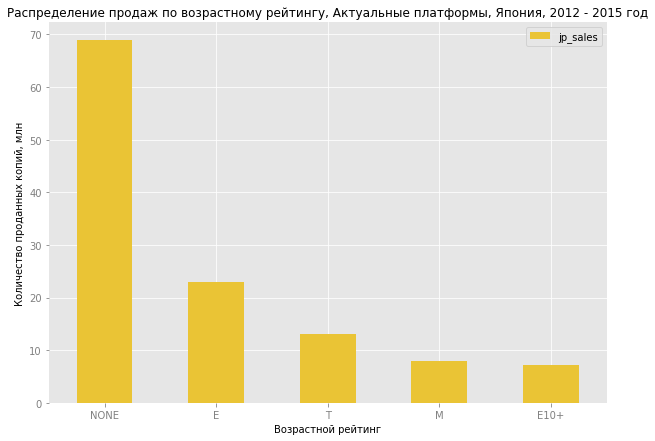

In [67]:
rating_chart_jp.plot( kind='bar', rot=0,grid = True)
ax = plt.axes()
plt.title('Распределение продаж по возрастному рейтингу, Актуальные платформы, Япония, 2012 - 2015 год')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Возрастной рейтинг')

plt.show()

Количество игр с неопределенным рейтингом намного больше, чем в американском и европейском регионах.  
Это может говорить о том, что довольно большому количеству игр, выпускаемых в японии, возрастной рейтинг не присваевается, либо существует отдельная система рейтинга для игр, выпускаемых только для японского рынка.

Среди игр, для которых рейтинг определен, самыми популярными в Японии являются игры без возрастных ограничений. Большинство игр для Nintendo такими и являются.

### Итоги


После анализа продаж для Северной Америки, Европы и Японии были сделаны следующие выводы:
 - Предпочтения Американцев и Европейцев практически идентичны: самыми популярными платформами являются PS4 и Xbox, и игры жанра Action и Shooter c рейтингами "Для взрослых". Главным отличием является намного меньшая популярность американской консоли Xbox в европейском регионе. 
 - В Японском регионе, несмотря на общемировое падение продаж игр для мобильных консолей, самой популярной консолью остается 3DS и соответсвующие ей игры жанра RPG с отсутствием возрастных ограничений. Так же было обнаружено, что для многих игр, выпускаемых в японии, возрастной рейтинг ESRB не присваевается.

## Проверка гипотез

 Проверим следующие гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Первая гипотеза

Сравим средние пользовательские рейтинги платформ Xbox One и PC

In [68]:
xbox_pc_score = games.query('user_score > -1 and platform in (["XOne","PC"])').groupby('platform')['user_score'].mean().to_frame()
xbox_pc_score

,user_score
platform,
PC,6.465217
XOne,6.477586


Сформируем нулевую и альтернативную гипотезу:

Нулевая гипотеза - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза - cредние пользовательские рейтинги платформ Xbox One и PC отличаются

Попробуем отвергнуть нулевую гипотезу:
 - Создадим два массива с данными о выручке рейтинге двух платформ
 - С помощью  метода st.ttest_ind сравним уровень значимости стастистики разности средних этих массивов.  
 - Сравним полученный уровень значимости с допустимым - 0.05.

In [69]:
array_xbox = games.query('user_score > -1 and platform == "XOne"')['user_score'].tolist()
array_pc = games.query('user_score > -1 and platform == "PC"')['user_score'].tolist()

alpha = 0.05

results = st.ttest_ind(array_xbox, array_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9463196313131612
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось - следовательно рейтинги для Xbox и PC скорее всего одинаковы.

### Вторая гипотеза

Сравним средние пользовательские рейтинги жанров Action и Sports

In [70]:
action_sports_score = games.query('user_score > -1 and genre in (["Action","Sports"])').groupby('genre')['user_score'].mean().to_frame()
action_sports_score

,user_score
genre,
Action,6.861187
Sports,5.461392


Сформируем нулевую и альтернативную гипотезу:

Нулевая гипотеза - cредние пользовательские рейтинги жанров Action и Sports одинаковые  
Альтернативная гипотеза - cредние пользовательские рейтинги жанров Action и Sports отличаются

Попробуем отвергнуть нулевую гипотезу:
 - Создадим два массива с данными о  рейтинге двух жанров
 - С помощью  метода st.ttest_ind сравним уровень значимости стастистики разности средних этих массивов.  
 - Сравним полученный уровень значимости с допустимым - 0.05.

In [71]:
array_action = games.query('user_score > -1 and genre == "Action"')['user_score'].tolist()
array_sports = games.query('user_score > -1 and genre == "Sports"')['user_score'].tolist()

alpha = 0.01

results = st.ttest_ind(array_action, array_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.3744684534520844e-23
Отвергаем нулевую гипотезу


Нулевую гипотезу получилось отвергнуть - следовательно рейтинги для Action и Sports скорее всего разные. Средние рейтинги для жанра Action в выборке выше - то же самое можем утверждать и для всей совокупности.

## Выводы 

В ходе исследования были сделаны следующие выводы:

Были изучены показатели продаж игр:
- Начиная с 2009 года глобальные продажи игр для представленных платформ упали из-за развития смартфонов как игровых платформ. Большие это сказалось на мобильных платформах, таких как 3DS  и PSV.
- Определен средний жизненный цикл платформы - 10 лет 
- Определен предпологаемый текущий актуальный период - с 2013 по 2023
- Определены актуальные платформы  - XOne, PS4, WiiU, 3DS, PSV, а так же персональные компьютеры.
- PS4 и XOne являются самыми перспективными платформами, а 3DS, несмотря на общий кризис мобильных платформ, все еще остается популярной, имея  в своей библиотеке игры с более чем 12 миллионами продаж.
- WiiU и PSV не смогли повторить успехи предыдущего поколения этих консолей и имеют самые малые продажи среди актуальных платформ.
- Для персональных компьютеров как игровой платформы показатели традиционно остаются низкими по сравнению с игровыми консолями.

Изучено влияние отзывов критиков и пользователей на продажи:
- Практически для всех актуальных платформ обнаружена слабая прямая зависимость между оценками критиков и продажами - довольно часто игры с хорошими оценками критиков имеют и большие продажи.
- Слабая прямая зависимость между оценками пользователей и продажами была обнаружена только у консолей Nindendo. Для остальных консолей мнение пользователей с уровнем продаж практически не коррелирует. Исключение составили персональные компьютеры, для них эта зависимость небольшая, но отрицательная - играм с большими продажами для этой платформы пользователи иногда ставят плохие оценки.

Изучены показатели успешности для всех жанров:
  - Самыми прибыльными оказались игры жанров Shooter, Platform и Simulation.
  - У игр жанров Strategy, Puzzle и Adventure отношение продаж к количеству релизов оказалось самым малым.

Были составлены портреты пользователей из Северной Америки, Европы и Японии:
* Предпочтения Американцев и Европейцев практически идентичны: самыми популярными платформами являются PS4 и Xbox, и игры жанра Action и Shooter c рейтингами "Для взрослых". 
* Главным отличием европейского региона от американского является намного меньшая популярность американской консоли Xbox.
* В Японском регионе, несмотря на общемировое падение продаж игр для мобильных консолей, самой популярной консолью остается 3DS и соответсвующие ей игры жанра RPG с отсутствием возрастных ограничений. Так же было обнаружено, что многим играм, выпускаемым для японского рынка, рейтинг ESRB не присваевается.

Были проверены гипотезы и сделаны следующие выводы:

- Средние пользовательские рейтинги платформ Xbox One и PC  оказались одинаковыми.
- Средние рейтинги игр жанра Action оказались выше, чем у игр жанра Sports.

Рекомендации для бизнеса:
 - В 2017 году следует учитывать PS4, как самой перспективную платформу на данный момент. Так-же, при работе с американским рынком следует выделить XOne, а с японским - 3DS.
 - На Американском и Европейском рынках следует ожидать лучших продаж для игр жанров Action и Shooter, рассчитанных на взрослую аудиторию, а на японском для игр жанра RPG.
 - Следует учитывать мнение критиков - игры с хорошими оценками часто показывают хорошие продажи. Мнение пользователей можно учитывать только при работе с играми для консолей Nintendo.

    